# Best Results

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
import pandas as pd

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns 

sns.set(color_codes = True)

%matplotlib inline

import plotly.graph_objects as go

from plotly.subplots import make_subplots

from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from textblob import Word

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, KFold

from textblob import TextBlob

import gender_guesser.detector as gender

import nltk

from nltk.corpus import stopwords

import re

import emoji

from scipy.stats import chi2_contingency

from matplotlib.patches import ConnectionPatch

from langdetect import detect

from nltk.probability import *

from nltk.tokenize import word_tokenize

from nltk import pos_tag

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

import plotly.graph_objects as go

from plotly.subplots import make_subplots

from afinn import Afinn

from sklearn.model_selection import cross_val_score, KFold

from sklearn.ensemble import RandomForestClassifier

from nltk.text import Text


import string

from collections import Counter

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

In [3]:
ml = pd.read_csv("ml.csv")

In [4]:
ml.dropna(subset = ["cleaned_text"], inplace = True)

In [5]:
ml.tail(1)

,starRating,Gender_Numeric,Year,cleaned_text,sentiment_score,word_count,avg_word,sentiment_label,sentiment_ml,sentiment
1647,5,1,2018,good,0.7,1,4.0,Positive,2,0


In [6]:
ml["sentiment"].value_counts()

sentiment
0    1645
Name: count, dtype: int64

In [7]:
tfidf = TfidfVectorizer(ngram_range = (1, 1), max_features = 500, tokenizer = word_tokenize)
X = tfidf.fit_transform(ml["cleaned_text"])
y = ml["sentiment_ml"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, 
                                                    random_state = 12, stratify = y)


## XGBoost

Accuracy: 0.8787878787878788
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.86      0.86      0.86        70
           2       0.89      0.92      0.91        88

    accuracy                           0.88       165
   macro avg       0.92      0.78      0.83       165
weighted avg       0.88      0.88      0.88       165

Accuracy on Training Set: 0.9918918918918919
Accuracy on Test Set: 0.8787878787878788


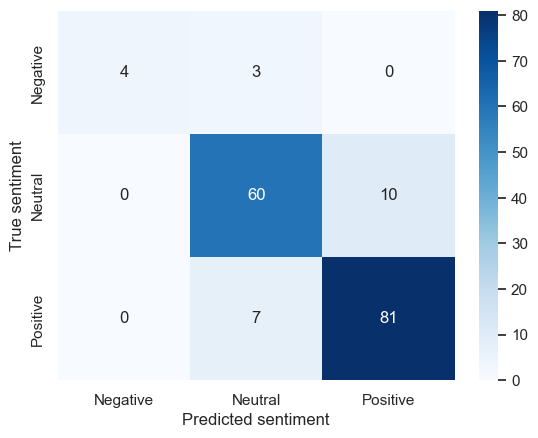

In [8]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
predicted_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, predicted_xgb)
print('Accuracy:', accuracy_xgb)
print('Classification Report:')
print(classification_report(y_test, predicted_xgb))

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)


cm_xgb = confusion_matrix(y_test, predicted_xgb)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_xgb, annot = True, cmap = 'Blues', fmt = 'g', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## Linear Support Vector Classification

Accuracy: 0.8545454545454545
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.86      0.80      0.83        70
           2       0.85      0.93      0.89        88

    accuracy                           0.85       165
   macro avg       0.90      0.72      0.77       165
weighted avg       0.86      0.85      0.85       165

Accuracy on Training Set: 0.9682432432432433
Accuracy on Test Set: 0.8545454545454545


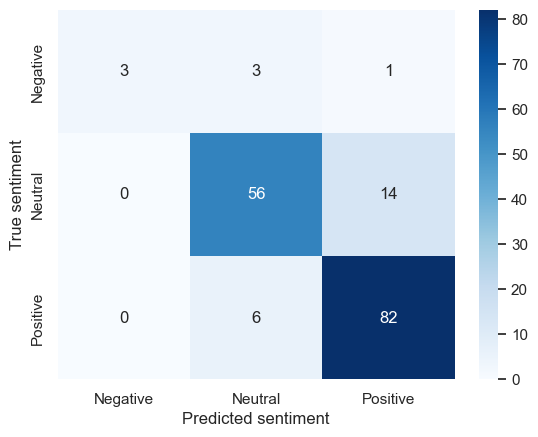

In [9]:
svc = LinearSVC(random_state=12)
svc.fit(X_train, y_train)
predicted_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, predicted_svc)
print('Accuracy:', accuracy_svc)
print('Classification Report:')
print(classification_report(y_test, predicted_svc))

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)


cm_svc = confusion_matrix(y_test, predicted_svc)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'learning_rate': [0.05, 0.1, 0.5],
  'max_depth': [2, 5, 10, 12],
  'n_estimators': [100, 300, 500, 1000],
  'subsample': [0.05, 0.25, 0.5, 1.0],
  'colsample_bytree': [0.05, 0.25, 0.5, 1.0]
}

xgb = XGBClassifier()

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = 'accuracy', cv = 5)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Cross-Validation Score:', grid_search.best_score_)

best_model = grid_search.best_estimator_
predicted_xgb = best_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, predicted_xgb)
print('Test Set Accuracy with Best Parameters:', accuracy_xgb)


cv_results = grid_search.cv_results_


Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 1.0}
Best Cross-Validation Score: 0.854054054054054
Test Set Accuracy with Best Parameters: 0.8787878787878788


In [12]:
cv_results

{'mean_fit_time': array([0.04302158, 0.05035191, 0.04195199, 0.04365063, 0.09771714,
        0.1085722 , 0.11462021, 0.12034793, 0.18013186, 0.25600185,
        0.30983362, 0.25665598, 0.44133158, 0.4952177 , 0.46804633,
        0.48908544, 0.04740825, 0.07761769, 0.08280506, 0.08710427,
        0.14133539, 0.23979125, 0.24706097, 0.33288622, 0.20947685,
        0.41687112, 0.48736486, 0.38383808, 0.4844182 , 1.2552515 ,
        0.84792223, 0.72958336, 0.04117789, 0.09930038, 0.19563737,
        0.15786967, 0.12662907, 0.27344074, 0.34484901, 0.41713614,
        0.2417028 , 0.44379044, 0.54212527, 0.63805833, 0.36885095,
        0.85130844, 1.08674302, 1.10218339, 0.04107265, 0.09934173,
        0.13511724, 0.17687869, 0.146134  , 0.3157608 , 0.4391665 ,
        0.46971397, 0.19613843, 0.46305265, 0.74282846, 0.73326397,
        0.38345976, 0.88433151, 1.06055908, 1.26097198, 0.05433083,
        0.04297504, 0.0408927 , 0.039253  , 0.09666853, 0.11519442,
        0.11300335, 0.11300001,

In [ ]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, refit=True)
grid_search.fit(X_train, y_train)

# Now cv_results_ will contain train and test set scores
cv_results = grid_search.cv_results_
print('Train Set Mean Scores:')
print(cv_results['mean_train_score'])
print('Test Set Mean Scores:')
print(cv_results['mean_test_score'])


In [ ]:


cm_svc = confusion_matrix(y_test, predicted_xgb)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'max_depth': [2, 5, 10, 15, 20],
    'min_child_weight': [2, 4, 6, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Initialize XGBClassifier
xgb = XGBClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, n_iter = 50,
                                   scoring = 'accuracy', cv = 5, verbose = 1, random_state = 42)

# Perform the random search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_xgb = random_search.best_estimator_

# Evaluate the best estimator on the test set
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predicted_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predicted_rf)
print('Accuracy:', accuracy_rf)
print('Classification Report:')
print(classification_report(y_test, predicted_rf))

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

cm_rf = confusion_matrix(y_test, predicted_rf)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## Naive Bayes Multinominal

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, predicted_nb)
print('Accuracy:', accuracy_nb)
print('Classification Report:')
print(classification_report(y_test, predicted_nb))

y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

cm_nb = confusion_matrix(y_test, predicted_nb)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
predicted_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, predicted_xgb)
print('Accuracy:', accuracy_xgb)
print('Classification Report:')
print(classification_report(y_test, predicted_xgb))

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)


cm_xgb = confusion_matrix(y_test, predicted_xgb)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_xgb, annot = True, cmap = 'Blues', fmt = 'g', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
predicted_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, predicted_lr)
print('Accuracy:', accuracy_lr)
print('Classification Report:')
print(classification_report(y_test, predicted_lr))

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

cm_lr = confusion_matrix(y_test, predicted_lr)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## Linear Support Vector Classification

In [ ]:
svc = LinearSVC(random_state=12)
svc.fit(X_train, y_train)
predicted_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, predicted_svc)
print('Accuracy:', accuracy_svc)
print('Classification Report:')
print(classification_report(y_test, predicted_svc))

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)


cm_svc = confusion_matrix(y_test, predicted_svc)
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()